<a href="https://colab.research.google.com/github/aseddin/F23_ECE4715/blob/main/4_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

Logistic regression is a classification model designed to assess the likelihood of an input instance belonging to a specific class. Unlike linear regression, which predicts actual values, logistic regression focuses on estimating probabilities.

In a logistic regression model, the weighted sum of input features, including a bias term, is calculated. This sum is then passed through a function that transforms it into a probability, represented by a number ranging between 0 and 1.

$$
\hat{p} = h_\theta({\bf X}) = \sigma({\bf\Theta^T X})
$$

## Sigmoid (Logistic) Function $\sigma(.)$

A sigmoid function is an S-shaped function that maps the entire real axis to a value between 0 and 1.

$$
\sigma(t) = \frac{1}{1 + e^{-t}}
$$

Or
$$
\sigma(t) = \frac{e^{t}}{1 + e^{t}}
$$

$t$ has several names (log-odds, logit, pre-activation)

$$
t = \sigma^{-1}(\hat{p})=\text{logit}(\hat{p}) = \text{log}\frac{\hat{p}}{1 - \hat{p}}
$$

The derivative

$$
\frac{d}{dt}\sigma(t) = \sigma(t) (1 - \sigma(t))
$$

## Class Prediction

After estimating the probability ($\hat{p}$) of belonging to a specific class, predictions can be made by comparing this estimate with a threshold, commonly set at 50%.

$$
\hat{y} =
\begin{cases}
0 & \hat{p} < 0.5\\
1 & \hat{p} \geq 0.5\\
\end{cases}
$$

In [1]:
# code to set things up

# importing common libraries
import numpy as np
import pandas as pd

# Things related to figures and plots
# make figures look nicer
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

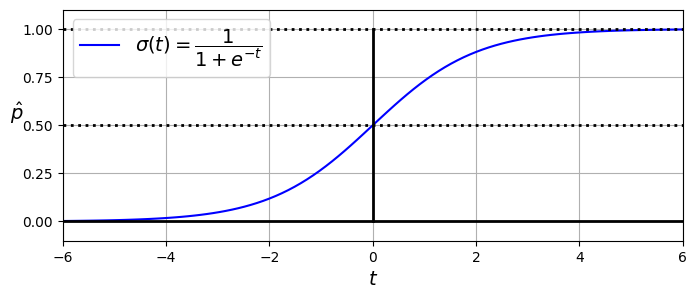

In [2]:
# Plot the sigmoid function

lim = 6
t = np.linspace(-lim, lim, 100)
sig = 1 / (1 + np.exp(-t))

plt.figure(figsize=(8, 3))
plt.plot(t, sig, "b-", label="$\sigma(t) = \dfrac{1}{1 + e^{-t}}$")

plt.plot([0, 0], [0, 1], "k-", linewidth=2)
plt.plot([-lim, lim], [0, 0], "k-", linewidth=2)

plt.plot([-lim, lim], [1, 1], "k:", linewidth=2)
plt.plot([-lim, lim], [0.5, 0.5], "k:", linewidth=2)

plt.axis([-lim, lim, -0.1, 1.1])
plt.gca().set_yticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel("$t$")
plt.ylabel("$\hat{p}$", rotation=0)
plt.grid()
plt.legend(loc="upper left")
plt.show()

It's important to recognize that with a 50% threshold, if $\sigma(t) < 0.5$, then $t < 0$, and if $\sigma(t) \geq 0.5$, then $t \geq 0$. Therefore, making prediction is simply done by figuring out whether the logit $t$ is positive or negative. Nonetheless, it is advisable to perform the logistic regression computation, especially when considering thresholds other than 50%, as specific scenarios may require different threshold values.

## Training and Cost Function

The goal of training is to determine a weight vector ${\bf\Theta}$ that enables the model to estimate high probabilities for positive classes ($y=1$) and low probabilities for negative classes ($y=0$). The following cost function captures this concept for a single training instance:

$$
c({\bf\Theta}) =
\begin{cases}
-\text{log}(\hat{p}) & y = 1 \\
-\text{log}(1 - \hat{p}) & y = 0 \\
\end{cases}
$$

For a positive class $(y=1)$
  * When $\hat{p}$ approches 0, the cost function will be very large
  * When $\hat{p}$ approaches 1, the cost function becomes 0

For a negative class $(y=0)$
  * When $\hat{p}$ approaches 0, the cost function becomes 0
  * When $\hat{p}$ approaches 1, the cost function will be very large

The cost function over the whole training set (all training instances) is an average cost and is called _log loss_:
$$
J( {\bf\Theta}) = -\frac{1}{m} \sum_{i=1}^{m}[y^{(i)}log(\hat{p}^{(i)}) + (1 - y^{(i)})log(1 - \hat{p}^{(i)})]
$$

There is no known closed-form equation to find ${\bf\Theta}$ that minimizes $J({\bf\Theta})$ (i.e. there is no equivalent to the Normal Equation for Linear Regression). However, this cost function is convex, so gradient descent should be able to find a good ${\bf\Theta}$.

The partial derivative of the cost function with regards to $\theta_j$
$$
\frac{\partial}{\partial \theta_j}J({\bf\Theta}) = \frac{1}{m}\sum_{i=1}^{m}(\sigma({\bf\Theta}^T {\bf X}^{(i)}) - y^{(i)})x_j^{(i)}
$$

This is similar to the partial derivative for linear regression:

$$
\frac{\partial}{\partial \theta_j}\text{MSE}({\bf\Theta}) = \frac{2}{m}
\sum_{i=1}^{m} ({\bf\Theta}^T {\bf X}^{(i)} - y^{(i)})x_j^{(i)}
$$

You can build a gradient vector and employ optimization techniques such as Batch Gradient Descent, Stochastic Gradient Descent, or Mini-Batch Gradient Descent to iteratively refine the model parameters. Additionally, $\ell_2$ or $\ell_1$ regularization can be applied.


# Load the Iris plants dataset

We will employ the iris dataset to demonstrate logistic regression and look at the decision boundaries.

In [3]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)

In [4]:
type(iris)

sklearn.utils._bunch.Bunch

In [5]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [7]:
iris.target.unique()

array([0, 1, 2])

In [8]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [10]:
iris.data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
# split the data into train/test datasets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.2, random_state=42, stratify=iris.target
)

## Single Class / Single Feature

We will train a logistic regression classifier using the **petal width** feature only and for the **virginica** class only (i.e. binary classification using one feature)

In [12]:
# Single feature (petal width (cm))
X_train_pw = X_train[["petal width (cm)"]].values
X_test_pw = X_test[["petal width (cm)"]].values

# Binary classification (Virginica VS not Virginica)
y_train_virginica = (y_train == 2).astype(np.int8)
y_test_virginica = (y_test == 2).astype(np.int8)

In [13]:
# Train a Logistic Regression model

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(penalty='l2', random_state=42)
log_reg.fit(X_train_pw, y_train_virginica)

LogisticRegression(random_state=42)

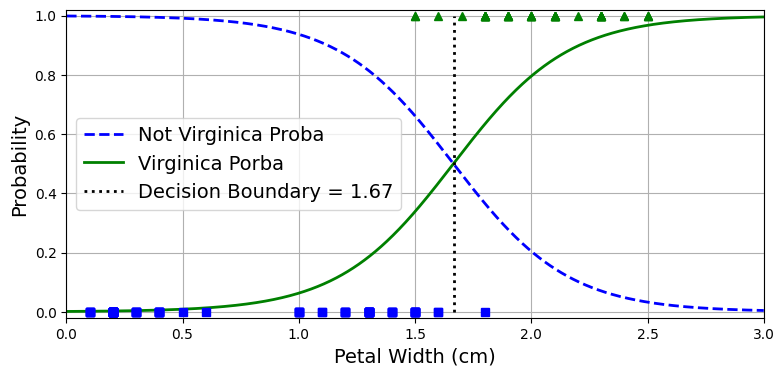

In [14]:
# Plot the decision boundary and estimated probabilities

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]

plt.figure(figsize=(9, 4))
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Virginica Proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Virginica Porba")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2, label=f"Decision Boundary = {decision_boundary:.2f}")

plt.plot(X_train_pw[y_train_virginica == 0], y_train_virginica[y_train_virginica==0], "bs")
plt.plot(X_train_pw[y_train_virginica == 1], y_train_virginica[y_train_virginica==1], "g^")
plt.xlabel("Petal Width (cm)")
plt.ylabel("Probability")
plt.legend(loc="center left")
plt.axis([0, 3, -0.02, 1.02])
plt.grid()
plt.show()

The blue squares represent "Not virginical flowers". The green triangles represent Virginica flowers. The dotted line represent the decision boundary. Flowers with petal width greater than the decision boundary will be classified as Virginica flowers; whereas, flowers with petal width less than the decision boundary will be classified as not Virginica.

The model seem to be confident that flowers with petal width greater than 2 are Virginica (Virginica proba > 80%)

The model seem to be confident that flowers with petal widths less than 1.25 are not Virginica (Not Virginica proba > 80%)

In [15]:
# the point at which both "Virginica" and "Not Virginica" have 50% probability
decision_boundary

np.float64(1.6666666666666667)

In [16]:
# predict the classes for 2 flowers

log_reg.predict([[1.7], [1.5]])

array([1, 0], dtype=int8)

In [17]:
# predict the class probabilites for 2 flowers
log_reg.predict_proba([[1.7], [1.5]])

array([[0.46472526, 0.53527474],
       [0.66163414, 0.33836586]])

## Single Class / Multiple Features

We now use 2 features: **Petal Width** and **Petal Length** to train a logistic regression classifier for the **virginica** class only (i.e. binary classification using multiple features)

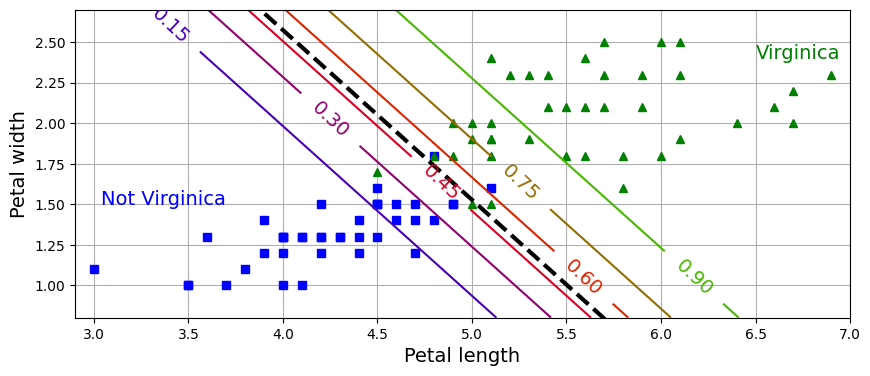

In [18]:
# 2 features (petal width (cm)) & (petal length (cm))
X_train_pwl = X_train[["petal length (cm)", "petal width (cm)"]].values
X_test_pwl = X_test[["petal length (cm)", "petal width (cm)"]].values

# Binary classification (Virginica VS not Virginica)
y_train_virginica = (y_train == 2).astype(np.int8)
y_test_virginica = (y_test == 2).astype(np.int8)

# Train a logistic regression
log_reg = LogisticRegression(penalty="l2", C=2, random_state=42)
log_reg.fit(X_train_pwl, y_train_virginica)

# contour plot for the probabilities
x0, x1 = np.meshgrid(
    np.linspace(2.9, 7, 500).reshape(-1, 1),
    np.linspace(0.8, 2.7, 200).reshape(-1, 1)
)
X_new = np.c_[x0.ravel(), x1.ravel()]
y_proba = log_reg.predict_proba(X_new)
zz = y_proba[:, 1].reshape(x0.shape) # virginica class

# for the decision boundary
left_right = np.array([2.9, 7])
boundary = -((log_reg.coef_[0, 0] * left_right + log_reg.intercept_[0])/log_reg.coef_[0, 1])

plt.figure(figsize=(10, 4))
plt.plot(X_train_pwl[y_train_virginica==0, 0], X_train_pwl[y_train_virginica == 0, 1], "bs")
plt.plot(X_train_pwl[y_train_virginica==1, 0], X_train_pwl[y_train_virginica == 1, 1], "g^")
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
plt.clabel(contour, inline=1)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.7, 1.5, "Not Virginica", color="b", ha="right")
plt.text(6.5, 2.4, "Virginica", color="g", ha="left")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.axis([2.9, 7, 0.8, 2.7])
plt.grid()
plt.show()

Note that regularization for a `LogisticRegression` model is controlled by the hyperparameter `C`, which is the inverse of the regularization parameter `alpha` $\alpha$ in other linear models (i.e. `LinearRegression`). In other words a higher `C` value corresponds to less regularization.

# Softmax Regression

Also named **Multinomial Logistic Regression**, is an extension of the binary logistic regression to support multiple classes. Without having to traing multiple binary classifiers (i.e. without OvO or OvR methods)


## Estimating probabilities and predictions:
1. For each instance ${\bf x}$ compute a weighted sum score for each class $k$:
$$
s_k({\bf x}) = ({\bf \theta}^{(k)})^T {\bf x}
$$
  Note that each class has its own parameter vector ${\bf \theta}^{(k)}$ and we can store the parameter vectors as rows in a parameter matrix ${\bf \Theta}$

2. Estimate the probability of each class by applying the _softmax function_ (aka _normalized exponential_) to each weighted sum score:
$$
\hat{p}_k = \sigma(s({\bf x}))_k = \frac{e^{s_k({\bf x})}}{\sum_{j=1}^{K} e^{s_j({\bf x})}}
$$
Where:
  * $K$ is the number of classes
  * $s({\bf x})$ is a vector containing the weighted sum scores of each class for the instance ${\bf x}$
  * $\sigma(s({\bf x}))_k$ is the estimated probability that instance ${\bf x}$ belongs to class $k$

3. The class with highest estimated probability will be the predicted class:
$$
\DeclareMathOperator*{\argmax}{argmax}
\hat{y} = \argmax_k \hat{p}_k
$$

## Training and Cost Function:

The objective is to have a model that estimates a high probability of the target class and low probability for the other classes.

Cross entropy is a good cost function and minimizing it should achieve the training objective:

$$
J({\bf \Theta}) = -\frac{1}{m} \sum_{i=1}^{m} \sum_{k=1}^{K}
y^{(i)}_k \log(\hat{p}^{(i)}_k)
$$

Where:
  * $y^{(i)}_k$ is the target probability the $i^{th}$ instance belongs to class $k$. (generally it is equal to 1 if the instance belongs to the class or 0 if it does not)

The gradient vector for this cost function with regards to class $k$'s parameter vector ${\bf \theta}^{(k)}$:
$$
\nabla_{{\bf \theta}^{(k)}} J({\bf \Theta}) = \frac{1}{m} \sum_{i=1}^{m} (\hat{p}^{(i)}_k - y^{(i)}_k) {\bf x}^{(i)}
$$

${\bf \Theta}$ that minimizes $J({\bf \Theta})$ can be found using gradient descent.




## Multiple Class / Multiple Features

We now use 2 features: **Petal Width** and **Petal Length** to train a Multinomial classifier (using the three different flower classes)

`LogisticRegression` uses softmax regression automatically when it is trained on more than two classes.

In [19]:
# 2 features (petal width (cm)) & (petal length (cm))
X_train_pwl = X_train[["petal length (cm)", "petal width (cm)"]].values
X_test_pwl = X_test[["petal length (cm)", "petal width (cm)"]].values

# Train a multinomial (multiclass) logistic regression (softmax regression)
softmax_reg = LogisticRegression(penalty="l2", C=30, solver='lbfgs', random_state=42)
softmax_reg.fit(X_train_pwl, y_train)

LogisticRegression(C=30, random_state=42)

In [20]:
test_instance = [[5, 2]]
softmax_reg.predict_proba(test_instance).round(2)

array([[0.  , 0.03, 0.97]])

In [21]:
softmax_reg.predict(test_instance)

array([2])

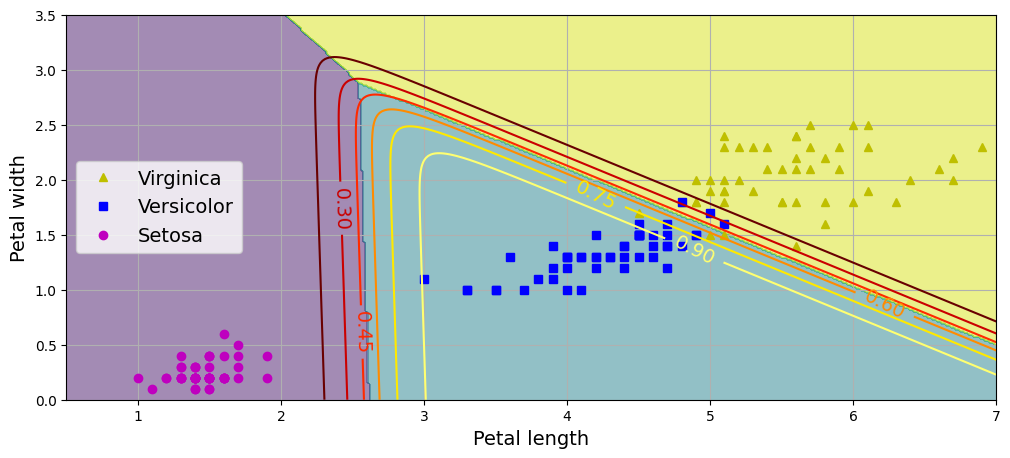

In [22]:
# plot the decision boundaries
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target.values

x0, x1 = np.meshgrid(np.linspace(0, 8, 500).reshape(-1, 1),
                     np.linspace(0, 3.5, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

# Uncomment one of the following 3 lines to see the relevant probabilities
#zz1 = y_proba[:, 0].reshape(x0.shape) # Setosa probabilities
zz1 = y_proba[:, 1].reshape(x0.shape) # Versicolor probabilities
#zz1 = y_proba[:, 2].reshape(x0.shape) # Virginica probabilities

zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(12, 5))
plt.plot(X[y == 2, 0], X[y == 2, 1], "y^", label="Virginica")
plt.plot(X[y == 1, 0], X[y == 1, 1], "bs", label="Versicolor")
plt.plot(X[y == 0, 0], X[y == 0, 1], "mo", label="Setosa")

plt.contourf(x0, x1, zz, alpha=0.5)

contour = plt.contour(x0, x1, zz1, cmap="hot")
plt.clabel(contour, inline=1)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="center left")
plt.axis([0.5, 7, 0, 3.5])
plt.grid()
plt.show()

The decision regions and boundaries are shown by the background colors.

The decision boundaries are linear between each pair of classes.

The probabilities for a specific class (selected by uncommenting its relevant line) is represented by the labeled curved lines.


In [23]:
from sklearn.metrics import classification_report

y_train_pred = softmax_reg.predict(X_train_pwl)
y_test_pred = softmax_reg.predict(X_test_pwl)


print("Train Scores")
print(classification_report(y_train, y_train_pred, target_names=iris["target_names"]))

print("----------------------")

print("Test Scores")
print(classification_report(y_test, y_test_pred, target_names=iris["target_names"]))

Train Scores
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       0.93      0.95      0.94        40
   virginica       0.95      0.93      0.94        40

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120

----------------------
Test Scores
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

